In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import HashingVectorizer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt

In [0]:
#Read the data using the Unnamed (probably id) as index
url = 'https://s3.amazonaws.com/drivendata/data/4/public/81e8f2de-9915-4934-b9ae-9705685c9d50.csv'
training = pd.read_csv(url, index_col='Unnamed: 0')

labels = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 
          'Sharing', 'Student_Type', 'Use']

numeric = ['FTE', 'Total']

categoric = [ 'Facility_or_Department', 'Function_Description', 
            'Fund_Description', 'Job_Title_Description', 'Location_Description', 
            'Object_Description', 'Position_Extra', 'Program_Description', 'SubFund_Description', 
            'Sub_Object_Description', 
            'Text_1', 'Text_2', 'Text_3', 'Text_4']

In [0]:
training.info()

## Data cleaning

### Part 1: numeric data
First of all, the numeric columns `FTE` and `Total` must be cleaned. The outliers will be treated as `NaN` values and imputation will be applied to the missing data. 

Each of the `NaN` values was populated with a value based on the `Object_Type` category it belongs to.

In [0]:
# Remove inconsistent data
training.loc[training['FTE'] < 0, 'FTE'] = np.nan
training.loc[training['Total'] < 0, 'Total'] = np.nan

In [0]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126020 non-null float64
Func

In [0]:
training[training['FTE'] < 0]

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1


In [0]:
training['Total'].describe()

count    3.518450e+05
mean     1.696423e+04
std      3.402292e+05
min      0.000000e+00
25%      1.384847e+02
50%      6.696800e+02
75%      4.999610e+03
max      1.297000e+08
Name: Total, dtype: float64

In [0]:
training.groupby('Object_Type')['Total'].mean()

Object_Type
Base Salary/Compensation       24145.844441
Benefits                         865.616621
Contracted Services            38163.380901
Equipment & Equipment Lease    11257.335020
NO_LABEL                       58545.010979
Other Compensation/Stipend      1604.962876
Other Non-Compensation         10646.892470
Rent/Utilities                 46610.910607
Substitute Compensation         1090.501980
Supplies/Materials              7745.381168
Travel & Conferences            1659.440688
Name: Total, dtype: float64

In [0]:
training['Total'].mean()

16964.228335602154

In [0]:
#Imputing data in Total column
def impute_func_total(data):
    if(pd.isnull(data['Total'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 24146
        if(data['Object_Type'] == 'Benefits'):
            return 38163
        if(data['Object_Type'] == 'Contracted Services'):
            return 24146
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 11257
        if(data['Object_Type'] == 'NO_LABEL'):
            return 58545
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 1605
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 10646
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 46611
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 1090
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 7745
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 1659
    else:
        return data['Total']

In [0]:
training['Total'] = training.apply(impute_func_total, axis = 1)

In [0]:
training['FTE'].describe()

count    125849.000000
mean          0.427436
std           0.573810
min           0.000000
25%           0.001078
50%           0.133337
75%           1.000000
max          46.800000
Name: FTE, dtype: float64

In [0]:
#Put FET data greater than 1 in percentage 
mask = training['FTE'] > 1
df_ToAtt = training[mask]

training.loc[mask, 'FTE'] = df_ToAtt['FTE'].div(100)

In [0]:
training['FTE'].describe()

count    125849.000000
mean          0.397216
std           0.446708
min           0.000000
25%           0.001078
50%           0.080819
75%           1.000000
max           1.000000
Name: FTE, dtype: float64

In [0]:
training.groupby('Object_Type')['FTE'].mean()

Object_Type
Base Salary/Compensation       0.457632
Benefits                       0.000000
Contracted Services            0.000000
Equipment & Equipment Lease    0.000000
NO_LABEL                       0.748446
Other Compensation/Stipend     0.000107
Other Non-Compensation         0.000000
Rent/Utilities                 0.000000
Substitute Compensation        0.000059
Supplies/Materials             0.000000
Travel & Conferences           0.000000
Name: FTE, dtype: float64

In [0]:
training['FTE'].mean()

0.397215825398393

In [0]:
#Imputing data in FTE column
def impute_func_FTE(data):
    if(pd.isnull(data['FTE'])):        
        if(data['Object_Type'] == 'Base Salary/Compensation'):
            return 0.45
        if(data['Object_Type'] == 'Benefits'):
            return 0.0
        if(data['Object_Type'] == 'Contracted Services'):
            return 0.0
        if(data['Object_Type'] == 'Equipment & Equipment Lease'):
            return 0.0
        if(data['Object_Type'] == 'NO_LABEL'):
            return 0.75
        if(data['Object_Type'] == 'Other Compensation/Stipend'):
            return 0.000107
        if(data['Object_Type'] == 'Other Non-Compensation'):
            return 0.0
        if(data['Object_Type'] == 'Rent/Utilities'):
            return 0.0
        if(data['Object_Type'] == 'Substitute Compensation'):
            return 0.000059
        if(data['Object_Type'] == 'Supplies/Materials'):
            return 0.0
        if(data['Object_Type'] == 'Travel & Conferences'):
            return 0.0
    else:
        return data['FTE']

In [0]:
training['FTE'] = training.apply(impute_func_FTE, axis = 1)

In [0]:
training[numeric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      400277 non-null float64
Total    400277 non-null float64
dtypes: float64(2)
memory usage: 9.2 MB


**Numeric data distribution after pre processing**

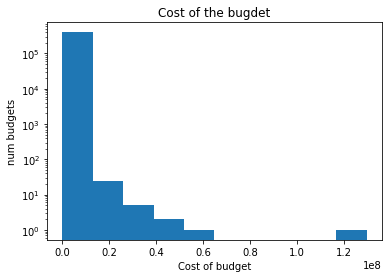

In [0]:
plt.hist(training['Total'], log=True)

# Add title and labels
plt.title('Cost of the bugdet')
plt.xlabel('Cost of budget')
plt.ylabel('num budgets')

plt.show()

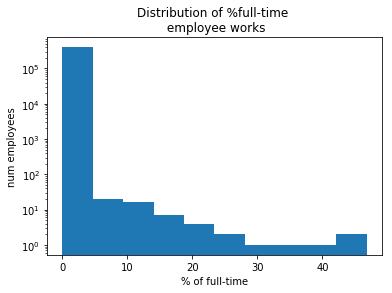

In [0]:
plt.hist(training['FTE'],  bins=10, log = True)

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

plt.show()

### Part 2: Categoric data

The strings must be normalized: symbols removed, all letters to lower case. Then, they can be transformed to numeric data.

In [0]:
for category in categoric:
    training[category] = training[category].str.lower()

In [0]:
#Check if the unique values decrease
training[categoric].nunique(dropna=False)

Facility_or_Department     176
Function_Description       655
Fund_Description           141
Job_Title_Description     3455
Location_Description       352
Object_Description         570
Position_Extra             580
Program_Description        418
SubFund_Description        267
Sub_Object_Description     159
Text_1                    1389
Text_2                     279
Text_3                      35
Text_4                     240
dtype: int64

In [0]:
#Convert columns
training[categoric] = training[categoric].apply(lambda x: x.astype('object'), axis = 0)

In [0]:
training[categoric].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 14 columns):
Facility_or_Department    53186 non-null object
Function_Description      298676 non-null object
Fund_Description          179157 non-null object
Job_Title_Description     272317 non-null object
Location_Description      155504 non-null object
Object_Description        332143 non-null object
Position_Extra            244180 non-null object
Program_Description       280943 non-null object
SubFund_Description       263731 non-null object
Sub_Object_Description    70748 non-null object
Text_1                    251891 non-null object
Text_2                    87431 non-null object
Text_3                    108613 non-null object
Text_4                    53384 non-null object
dtypes: object(14)
memory usage: 45.8+ MB


Before removing symbols, let's take a peek on some values and so we can detect the diferrences later


In [0]:
some_functions = training['Function_Description'].value_counts(normalize=True) > 0.05
some_functions.head(6)

non-project                        True
instruction                        True
unalloc budgets/schools            True
basic (fefp k-12)                 False
employee retirement               False
ela e-teaching sheltered eng      False
Name: Function_Description, dtype: bool

In [0]:
training['Function_Description'].value_counts(normalize=True).head(6)

non-project                       0.191686
instruction                       0.128882
unalloc budgets/schools           0.055458
basic (fefp k-12)                 0.044473
employee retirement               0.043723
ela e-teaching sheltered eng      0.021093
Name: Function_Description, dtype: float64

In [0]:
training[categoric] = training[categoric].fillna("")

In [0]:
training['Function_Description'].isnull().sum()

0

## Sample reduction

In [0]:
#!pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 465kB/s ta 0:00:01
    100% |████████████████████████████████| 5.4MB 448kB/s ta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


In [0]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=0)

#X = training[categoric]
#y = training[labels]

In [0]:
#X_resampled, y_resampled = rus.fit_resample(X, y)

TypeError: '<' not supported between instances of 'str' and 'float'

## CountVectorizer & Dimensionality Reduction

In [0]:
# Join all text items in a row that have a space in between
text_data = training[categoric].apply(lambda x: " ".join(x), axis = 1)

In [0]:
text_data

In [0]:
#Stop word list https://aclweb.org/anthology/W18-2502
stop_words = ['a', 'e', 'i', 'o', 'u', 'to', 'all', 'of', 'for', 'and', 'or', 'b', 'with', 'not', 'than', 'other', 'top', 's', 'k', 'in', 'the']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2), stop_words = stop_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['a', 'e', 'i', 'o', 'u', 'to', 'all', 'of', 'for', 'and', 'or', 'b', 'with', 'not', 'than', 'other', 'top', 's', 'k', 'in', 'the'],
        strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
        tokenizer=None, vocabulary=None)

In [0]:
#bag_of_words = vec.transform(text_data)

In [0]:
#sum_words = bag_of_words.sum(axis=0)

In [0]:
#words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [0]:
#words_freq

[('general', 300550),
 ('regular', 257258),
 ('fund', 233846),
 ('services', 181559),
 ('school', 174326),
 ('instructional', 169880),
 ('general fund', 159059),
 ('instruction', 154529),
 ('employee', 121791),
 ('salaries', 118583),
 ('education', 115535),
 ('teacher', 109395),
 ('special', 75179),
 ('benefits', 74431),
 ('employee benefits', 74265),
 ('staff', 71877),
 ('support', 71565),
 ('regular instruction', 70683),
 ('elementary', 69049),
 ('part', 66762),
 ('title', 66716),
 ('wages', 62631),
 ('instructional staff', 61491),
 ('salaries wages', 59687),
 ('project', 58596),
 ('instruction regular', 55054),
 ('fund regular', 51245),
 ('instructional general', 49723),
 ('teachers', 48906),
 ('food', 48279),
 ('substitute', 47421),
 ('basic', 45886),
 ('sub', 45683),
 ('extra', 43550),
 ('operations', 43020),
 ('education general', 41337),
 ('duty', 40577),
 ('extra duty', 40577),
 ('time', 39812),
 ('personal', 39343),
 ('personal services', 39343),
 ('operating', 39309),
 ('supp

In [0]:
#msg = "There are {} tokens in this dataset if we split on non-alpha numeric"
#print(msg.format(len(vec.get_feature_names())))
#print(vec.get_feature_names()[50:70])

There are 31913 tokens in this dataset if we split on non-alpha numeric
['2nd', '2nd award', '2nd grade', '2nd lang', '2nd shift', '2nd undistributed', '3rd', '3rd grade', '3rd reading', '4th', '4th grade', '5', '5 teachers', '56', '56 days', '5th', '5th grade', '6', '6 federal', '6 local']


### Feature selection 

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

X_train_features = vec.fit_transform(text_data)
y_train_labels = training["Object_Type"]

ch2 = SelectKBest(chi2, k = 1000)
X_train_x = ch2.fit(X_train_features, y_train_labels)

In [ ]:
len(vec.vocabulary_.items())

.get_support() returns a array of booleans that indicates if an element was selected or not

In [ ]:
feature_list = X_train_x.get_support()

In [ ]:
feature_list.shape

In [ ]:
#list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(33551)]

feature_list is used to find the selected elements in countVectorized dictionary

In [ ]:
#List of selected KBest words
features = []
columns = []
for i in range(0, 33552):
    if(feature_list[i]):
        value = list(vec.vocabulary_.keys())[list(vec.vocabulary_.values()).index(i)]
        x = (i, value)
        features.append(x)
        columns.append(i)

In [ ]:
features

selected_features with only k columns

In [ ]:
#Select only KBest columns
selected_features = X_train_features[:,columns]

In [ ]:
df_training[numeric].shape

In [ ]:
##All the data in space matrix
from scipy import sparse
numeric_features = df_training[numeric].values

training_data = sparse.hstack((selected_features, numeric_features))

In [ ]:
type(training_data)

## Export all pre-processed data

In [ ]:
sparse.save_npz("training_data.npz", training_data)

#read_matrix_back = sparse.load_npz("training_data.npz")

## Hash Vectorizer

In [0]:
# Remove symbols
'''for category in categoric:
    training[category] = training[category].str.replace(r"[&/\)('\"-.,]","")'''
#vec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2))

In [0]:
#hec = HashingVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", norm=None,
                                                     ngram_range=(1,2))
#hashed_text = hec.fit_transform(text_data)

In [0]:
#hashed_df = pd.DataFrame(hashed_text.data)
#print(hashed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866634 entries, 0 to 10866633
Data columns (total 1 columns):
0    float64
dtypes: float64(1)
memory usage: 82.9 MB
None


## Simple model to verify tokenization by CountVectorizer and Dimensionality reduction

(Ignore)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [0]:
#text_data = training[categoric]

In [0]:
text_data_10000 = training.copy()

In [0]:
text_data_10000.info()

In [0]:
df_dummies = pd.get_dummies(text_data_10000[['Object_Type']])

In [0]:
text_data_10000 = text_data_10000[categoric]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text_data_10000,
                                                    df_dummies,
                                                    test_size=0.2, 
                                                    random_state=42)

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 233021 to 408226
Data columns (total 25 columns):
Function                  7086 non-null object
Use                       7086 non-null object
Sharing                   7086 non-null object
Reporting                 7086 non-null object
Student_Type              7086 non-null object
Position_Type             7086 non-null object
Object_Type               7086 non-null object
Pre_K                     7086 non-null object
Operating_Status          7086 non-null object
Object_Description        8000 non-null object
Text_2                    8000 non-null object
SubFund_Description       8000 non-null object
Job_Title_Description     8000 non-null object
Text_3                    8000 non-null object
Text_4                    8000 non-null object
Sub_Object_Description    8000 non-null object
Location_Description      8000 non-null object
FTE                       8000 non-null float64
Function_Description      8000 non-null

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import FunctionTransformer

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import TruncatedSVD, NMF

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV

In [0]:
def combine_text_columns(dataset):
    return dataset[categoric].apply(lambda x: " ".join(x), axis = 1)

In [0]:
get_text_data = FunctionTransformer(combine_text_columns, validate = False)

In [0]:
stop_words = ['a', 'e', 'i', 'o', 'u', 'to', 'all', 'of', 'for', 'and', 'or', 'b', 'with', 'not', 'than', 'other', 'top', 's', 'k', 'in', 'the']
vec = CountVectorizer(token_pattern="[A-Za-z0-9]+(?=\\s+)", ngram_range=(1,2), stop_words = stop_words)

In [0]:
# Edit model step in pipeline
pl = Pipeline([
        ('selector', get_text_data),
        ('vectorizer', vec),
        #('reduce_dim', TruncatedSVD(n_iter=7, n_components = 1000)),
        #('reduce_dim', NMF(n_components = 200)),
        ('reduce_dim', SelectKBest(chi2, 1000)),
        ('clf', RandomForestClassifier())
    ])

In [26]:
# Fit to the training data
pl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function combine_text_columns at 0x7f827828b048>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=False)), ('vectorizer', CountVectorizer(analyzer='wo...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
from sklearn.metrics import accuracy_score

y_pred = pl.predict(X_test)
accuracy_score(y_test.values, y_pred, normalize=True)

0.9786274607774558

In [0]:
N_FEATURES_OPTIONS = [200, 500, 1000]
#mean_scores_10000 = [[0.904, 0.92175, 0.82725], [0.892, 0.9205, 0.91425]]
#mean_score_all_dataSet = [[0.9661736784251024, 0.9259018686919157], [0.963250724492855, 0.9740181872689118], [0.9565054461876686, 0.9786274607774558]]
mean_score_all_dataSet = [0.9661736784251024, 0.963250724492855, 0.9565054461876686, 0.9259018686919157, 0.9740181872689118, 0.9786274607774558]

In [0]:
reducer_labels = ['SVD', 'KBest(chi2)']

In [0]:
N_FEATURES_OPTIONS = [100, 200, 1000]
C_OPTIONS = [100, 200, 300, 1000]
param_grid = [
    {
        'reduce_dim': [TruncatedSVD(n_iter=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf__n_estimators': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'clf__n_estimators': C_OPTIONS
    },
]
reducer_labels = ['SVD', 'NMF', 'KBest(chi2)']

In [0]:
grid = GridSearchCV(pl, cv=5, n_jobs=1, param_grid=param_grid)

#grid.fit(X_train, y_train)

In [0]:
#mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = np.array(mean_score_all_dataSet)
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(1, -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)


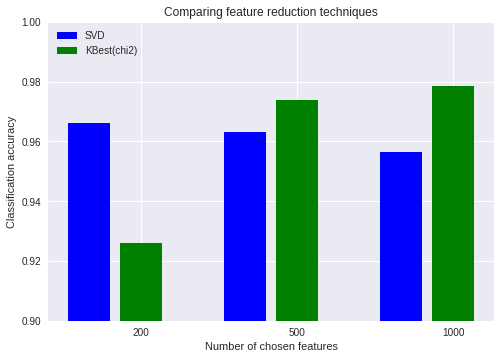

In [44]:
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Number of chosen features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0.90, 1))
plt.legend(loc='upper left')

plt.show()
#SVD = [0.9661736784251024, 0.963250724492855, 0.9565054461876686]
#mean_score_all_dataSet = [0.9661736784251024, 0.963250724492855, 0.9565054461876686, 0.9259018686919157, 0.9740181872689118, 0.9786274607774558]

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320221 entries, 444691 to 172004
Data columns (total 14 columns):
Facility_or_Department    320221 non-null object
Function_Description      320221 non-null object
Fund_Description          320221 non-null object
Job_Title_Description     320221 non-null object
Location_Description      320221 non-null object
Object_Description        320221 non-null object
Position_Extra            320221 non-null object
Program_Description       320221 non-null object
SubFund_Description       320221 non-null object
Sub_Object_Description    320221 non-null object
Text_1                    320221 non-null object
Text_2                    320221 non-null object
Text_3                    320221 non-null object
Text_4                    320221 non-null object
dtypes: object(14)
memory usage: 36.6+ MB


## Save df in a new CSV

In [0]:
training.to_csv(index = False)